In [ ]:
import os

# Define datasets, experiment names, and expected filenames
datasets = ["realworld_mobiact"]
experiment_names = ["Df", "Syn", "Df_Syn", "FS_Dpfs", "FS_Df_Dpfs", "FS_Syn", "FS_Df_Syn", "FS_Syn_Dpfs", "FS_Df_Syn_Dpfs", "FS_Df_plus_Dpfs", "FS_Df_plus_Syn", "Dp"]
experiment_names = ["Df", "Df_aug", "Df_rot", "Syn", "Syn_aug", "Df_Syn", "Dp"]
required_files = [f"{dataset}_{experiment}.csv" for dataset in datasets for experiment in experiment_names]

# Directory containing the result files
results_dir = "results"

# Check for missing files
missing_files = [file for file in required_files if not os.path.isfile(os.path.join(results_dir, file))]

# Print results
if missing_files:
    print("The following files are missing:")
    for file in missing_files:
        print(file)
else:
    print("All required files are present.")


All required files are present.


In [2]:
import os
import pandas as pd

def create_summary_csv(dataset, results_dir="results"):
    
    # Dictionary to store data for each source across experiments and modes
    data_acc = {}
    data_loss = {}
    data_f1 = {}
    
    for experiment in experiment_names:
        file_path = os.path.join(results_dir, f"{dataset}_{experiment}.csv")
        if os.path.isfile(file_path):
            # Read the file and extract source, mode, and accuracy columns
            df = pd.read_csv(file_path)
            # Group by 'source', then compute the average accuracy for each combination
            avg_accuracy = df.groupby(['source'])['accuracy'].mean()
            avg_loss = df.groupby(['source'])['loss'].mean()
            avg_f1 = df.groupby(['source'])['f1'].mean()
            # Store results in dictionary
            data_acc[experiment] = round(avg_accuracy, 4)
            data_loss[experiment] = round(avg_loss, 4)
            data_f1[experiment] = round(avg_f1, 4)
        else:
            print(f"Warning: {file_path} does not exist and will be skipped.")
    
    # Combine all data into a single DataFrame
    summary_acc = pd.concat(data_acc.values(), axis=1, keys=data_acc.keys())
    summary_loss = pd.concat(data_loss.values(), axis=1, keys=data_loss.keys())
    summary_f1 = pd.concat(data_f1.values(), axis=1, keys=data_f1.keys())
    
    # # Save the result to a new CSV file
    # output_file = os.path.join(results_dir, f"{dataset}_results.csv")
    # summary_df.to_csv(output_file)
    # print(f"Summary CSV file saved as: {output_file}")

    print(summary_acc)
    print()
    print(summary_loss)
    print()
    print(summary_f1)

# Usage example
create_summary_csv("realworld_mobiact")


           Df  Df_aug  Df_rot     Syn  Syn_aug  Df_Syn      Dp
source                                                        
WAL     0.479  0.7479  0.6676  0.7629     0.72  0.7316  0.9058

            Df  Df_aug  Df_rot     Syn  Syn_aug  Df_Syn      Dp
source                                                         
WAL     8.1647  1.2184  2.9432  1.5187   1.8006  1.8611  0.2567

            Df  Df_aug  Df_rot     Syn  Syn_aug  Df_Syn      Dp
source                                                         
WAL     0.4173  0.7291  0.6564  0.7283   0.6359  0.7119  0.8911


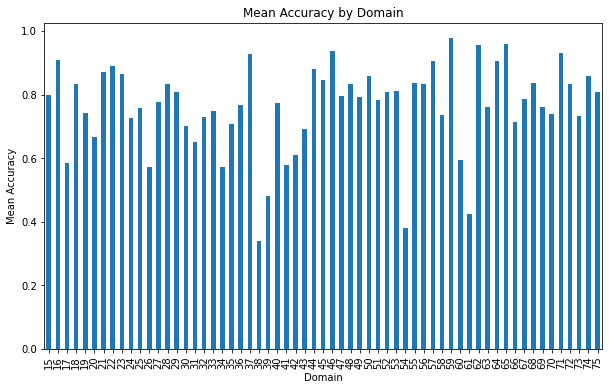

Worst n domains with their accuracies:
domain
38    0.340426
54    0.380952
61    0.425532
39    0.481481
26    0.571429
34    0.571429
41    0.577778
17    0.584906
60    0.595745
42    0.608696
Name: accuracy, dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'results/realworld_mobiact_Syn.csv'
data = pd.read_csv(file_path)

# Group by 'domain' and calculate mean accuracy
domain_accuracies = data.groupby('domain')['accuracy'].mean()

# Plot the accuracies
plt.figure(figsize=(10, 6))
domain_accuracies.plot(kind='bar')
plt.xlabel('Domain')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy by Domain')
plt.show()

# Get the worst n domains with their accuracies
worst_n_domains = domain_accuracies.nsmallest(10)
print("Worst n domains with their accuracies:")
print(worst_n_domains)

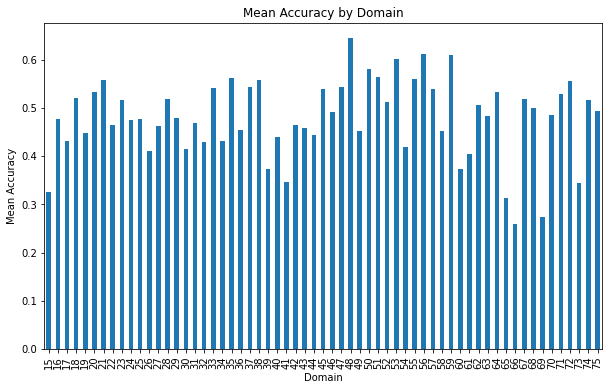

Worst n domains with their accuracies:
domain
66    0.259524
69    0.273810
65    0.314000
15    0.326000
73    0.343902
41    0.346667
39    0.372222
60    0.372340
61    0.404255
26    0.409524
Name: accuracy, dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'results/realworld_mobiact_Df.csv'
data = pd.read_csv(file_path)

# Group by 'domain' and calculate mean accuracy
domain_accuracies = data.groupby('domain')['accuracy'].mean()

# Plot the accuracies
plt.figure(figsize=(10, 6))
domain_accuracies.plot(kind='bar')
plt.xlabel('Domain')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy by Domain')
plt.show()

# Get the worst n domains with their accuracies
worst_n_domains = domain_accuracies.nsmallest(10)
print("Worst n domains with their accuracies:")
print(worst_n_domains)

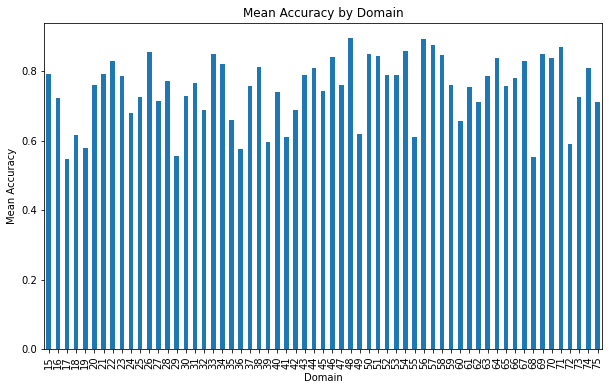

Worst n domains with their accuracies:
domain
17    0.547170
68    0.551163
29    0.554762
36    0.576744
19    0.577778
72    0.590476
39    0.596296
41    0.608889
55    0.610204
18    0.614815
Name: accuracy, dtype: float64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = 'results/realworld_mobiact_Df_aug.csv'
data = pd.read_csv(file_path)

# Group by 'domain' and calculate mean accuracy
domain_accuracies = data.groupby('domain')['accuracy'].mean()

# Plot the accuracies
plt.figure(figsize=(10, 6))
domain_accuracies.plot(kind='bar')
plt.xlabel('Domain')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy by Domain')
plt.show()

# Get the worst n domains with their accuracies
worst_n_domains = domain_accuracies.nsmallest(10)
print("Worst n domains with their accuracies:")
print(worst_n_domains)